/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


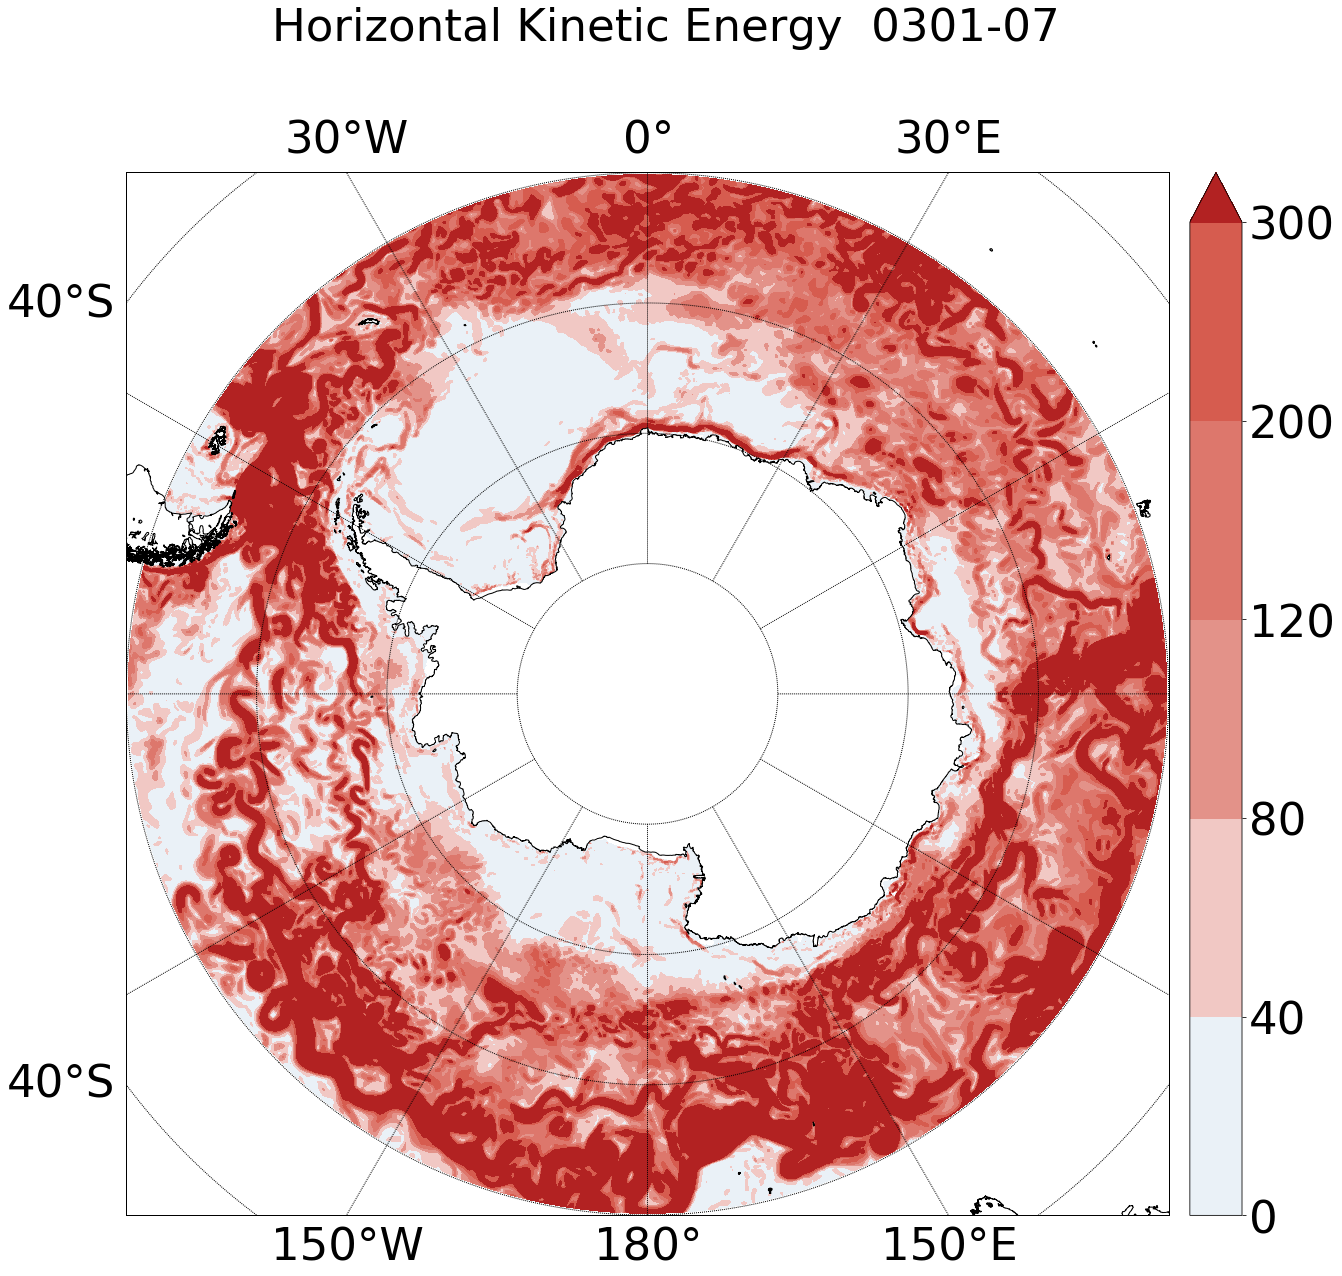

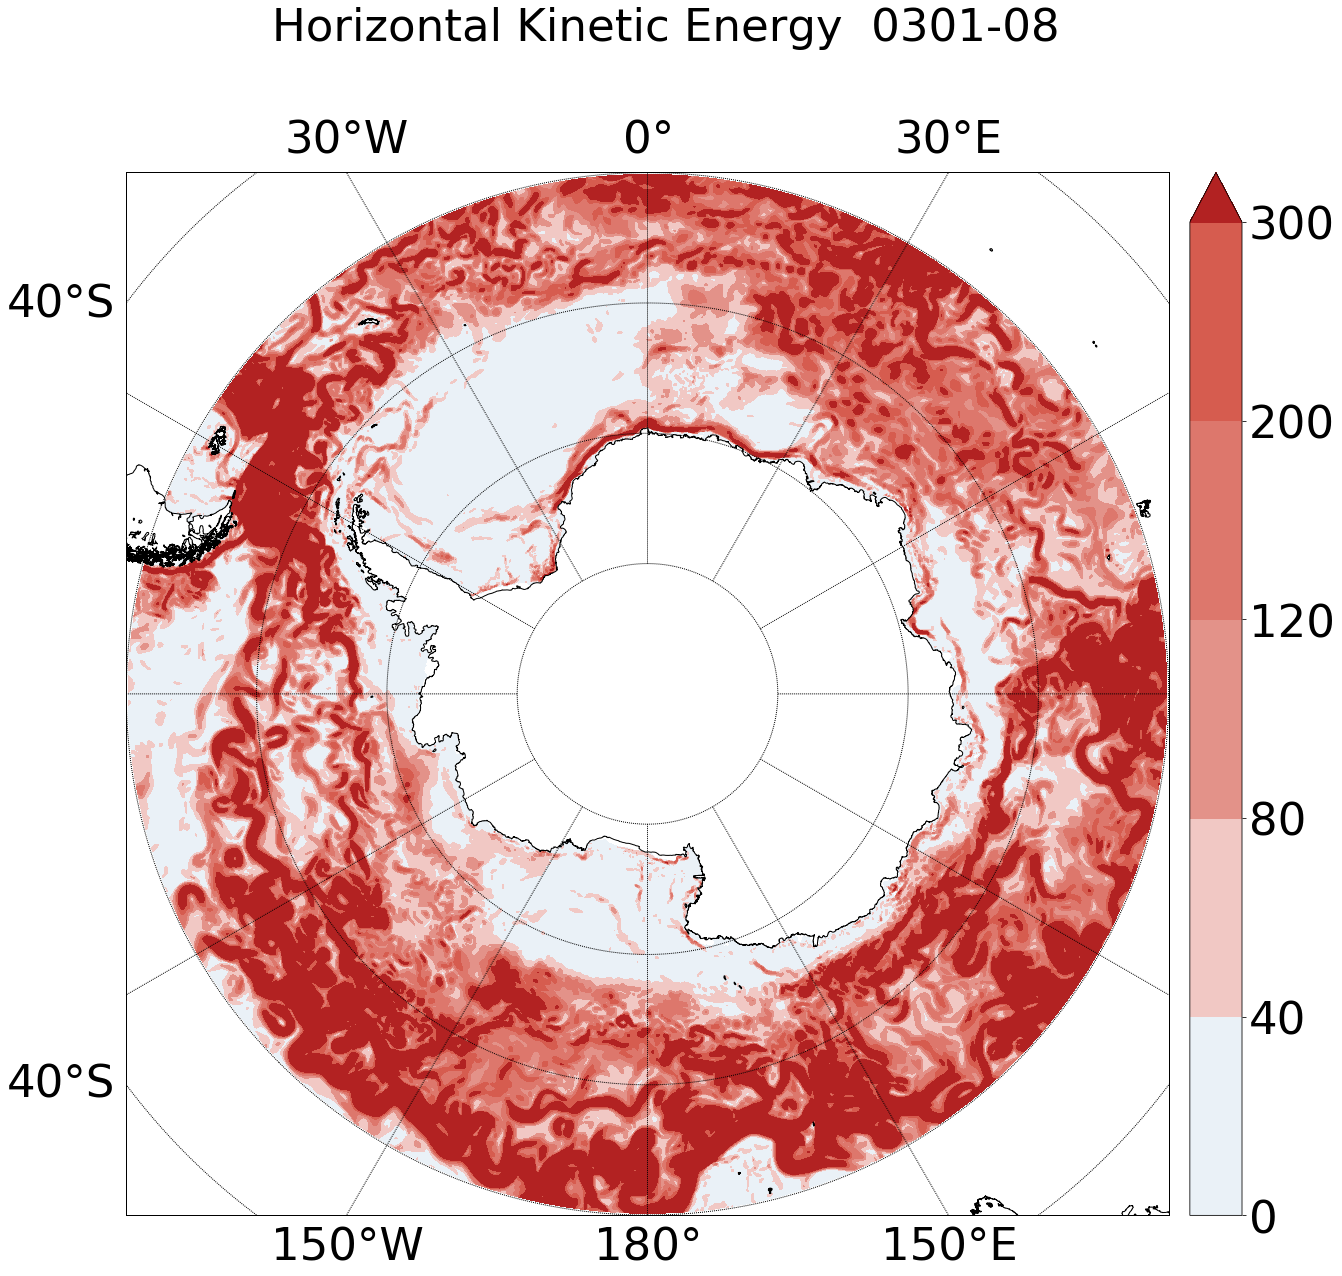

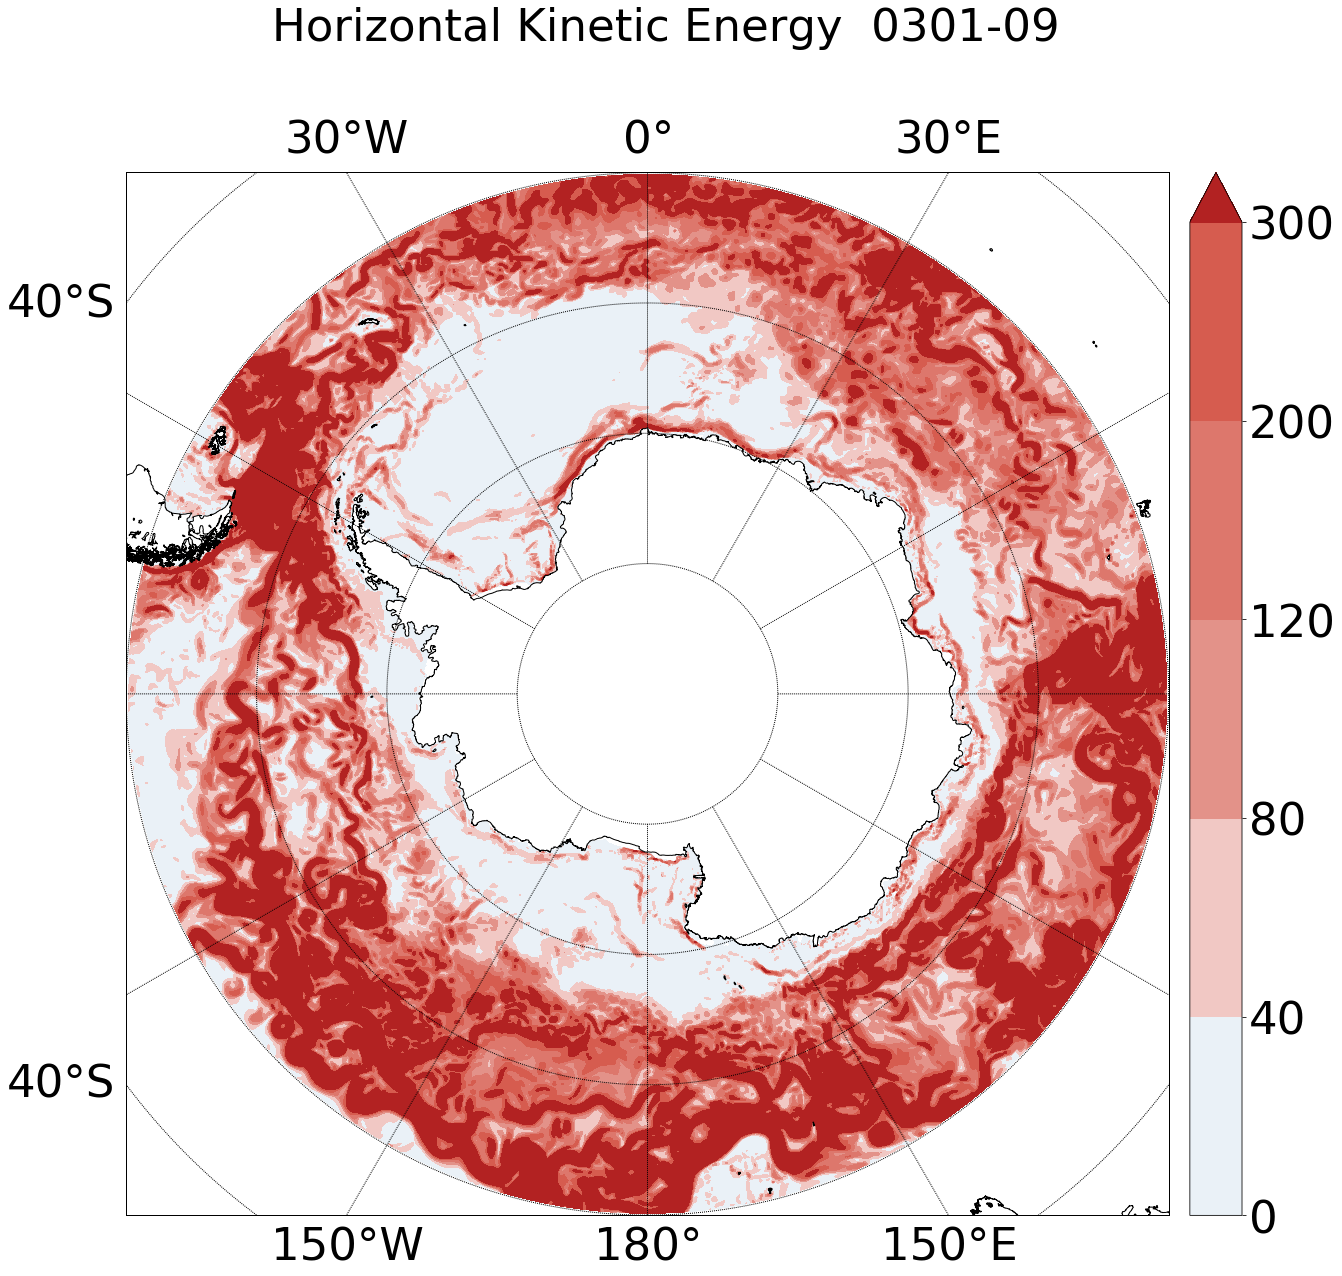

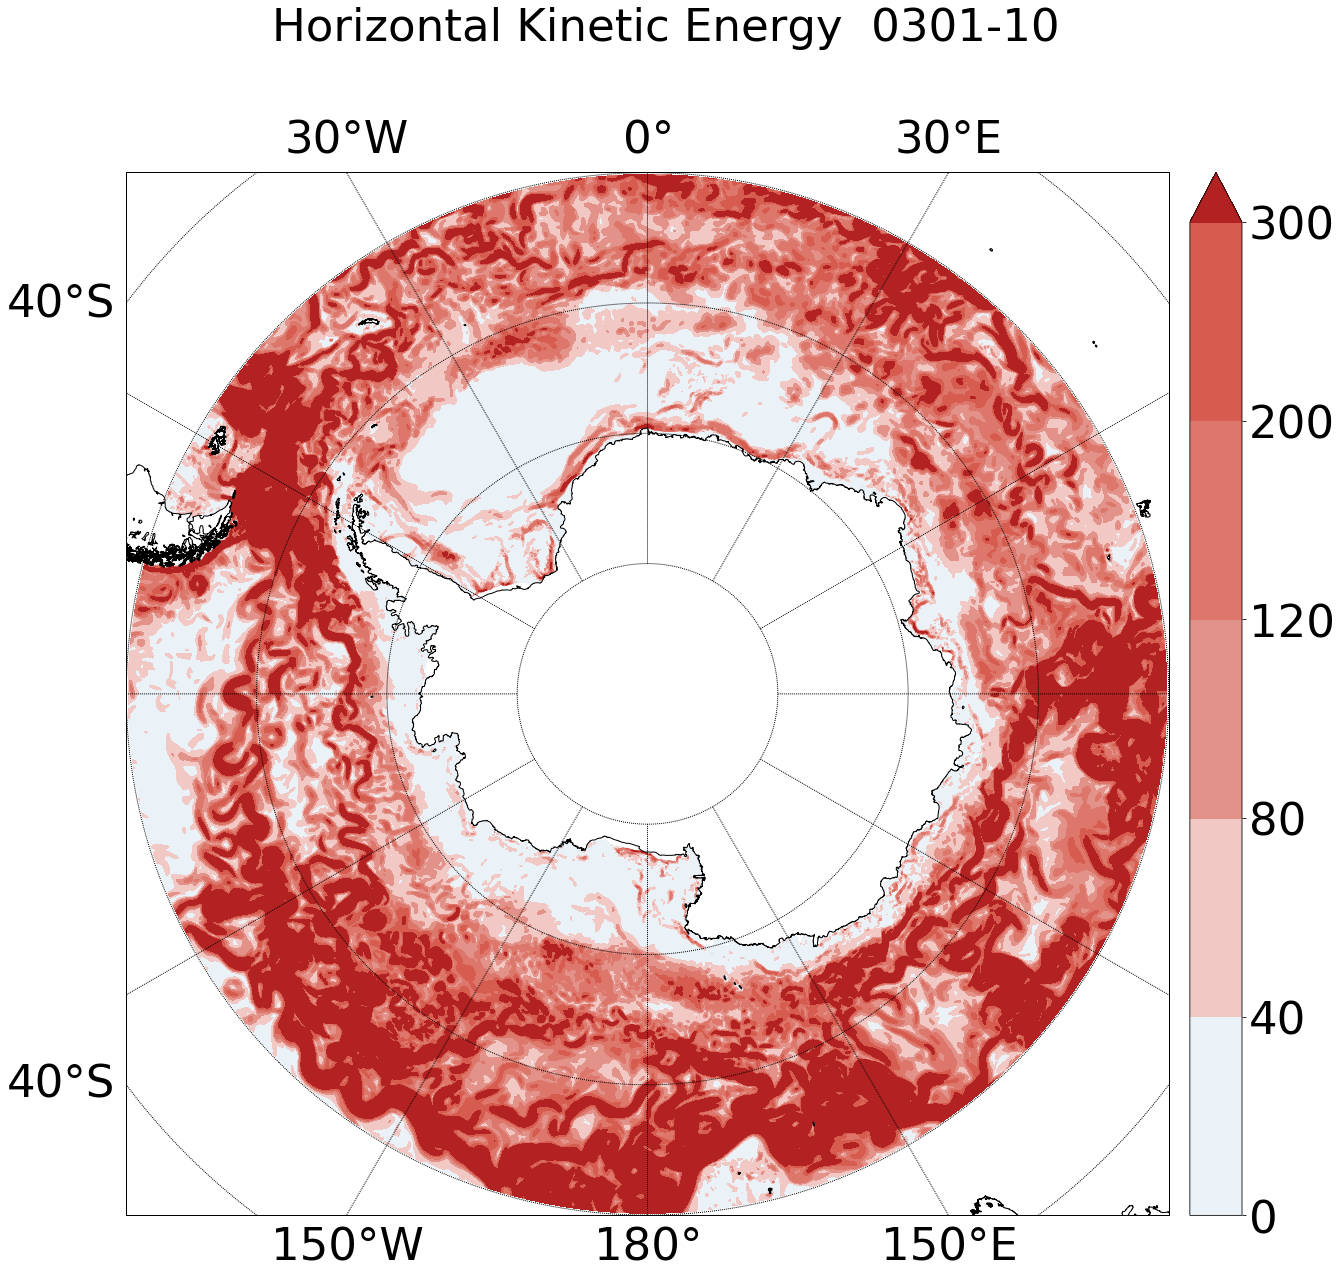

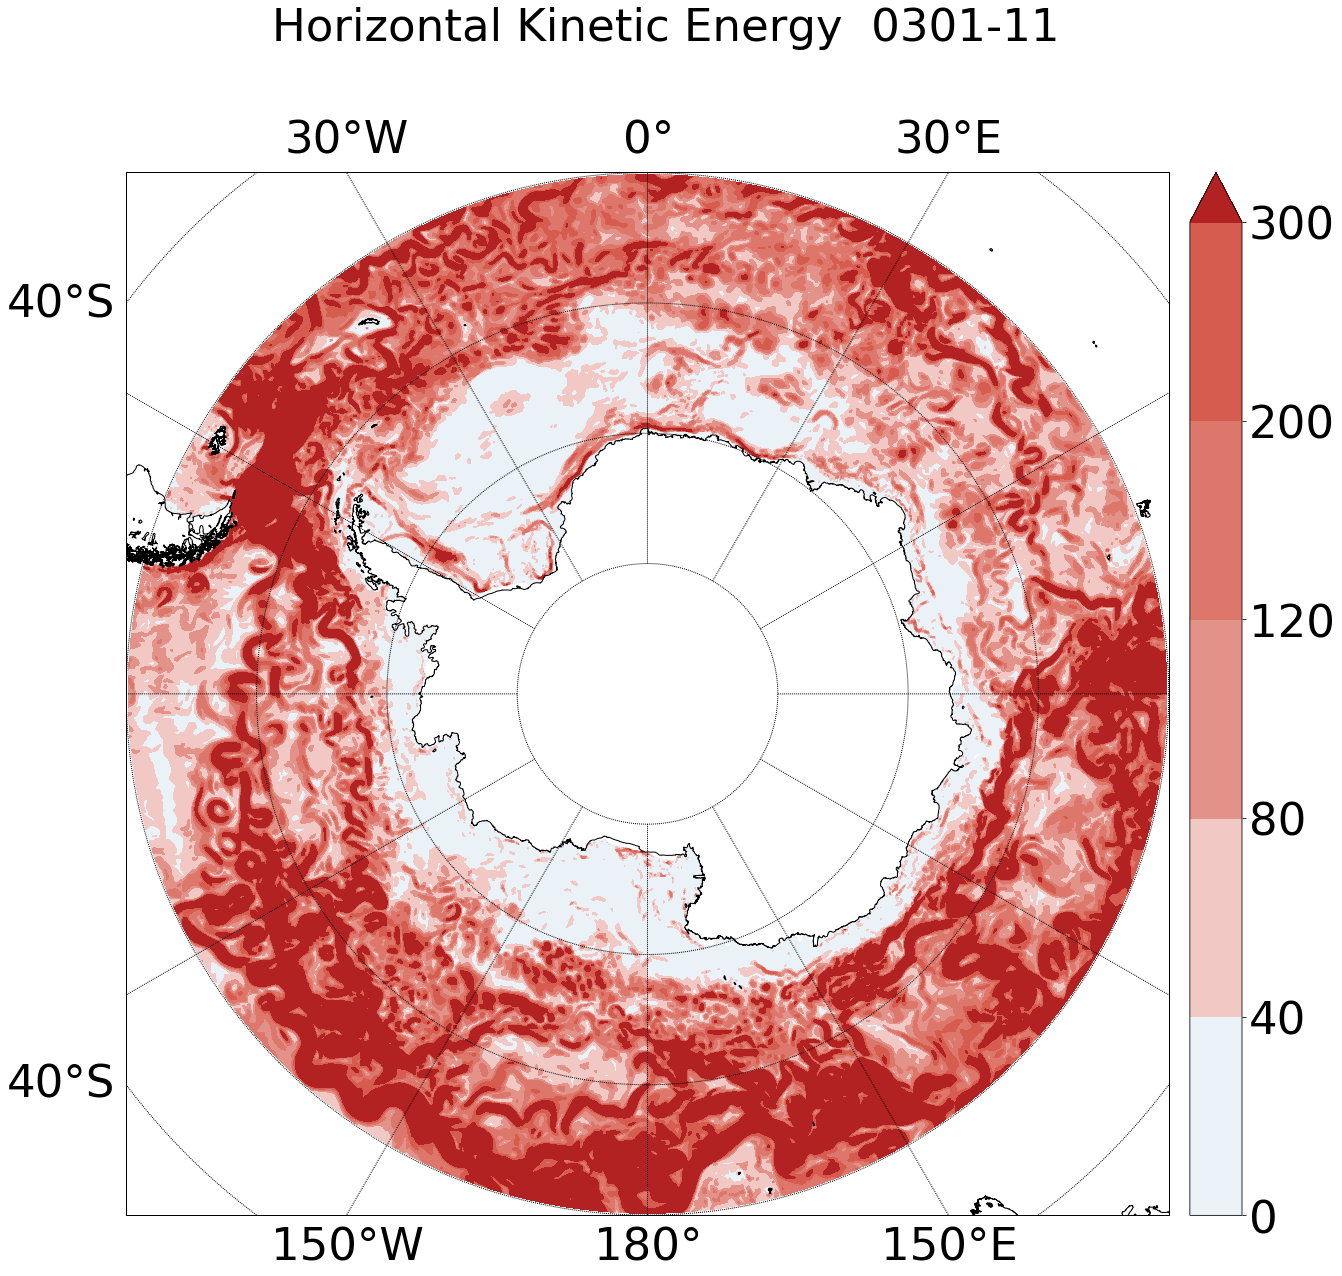

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

months = [f"{x:02d}" for x in range(7,12)]
years = [f"{x:04d}" for x in range(301,302)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.KE.nc')
        plotvar = data.variables['KE'][0,0:10,:,:]
        plotvar[plotvar == -1.0] = np.nan
        lont = data.variables['ULONG'][:,:]
        latt = data.variables['ULAT'][:,:]
        po = np.nanmean(plotvar,axis=0)
        # Pick some of the nicer colors from the palette...
        #nice_cmap=plt.get_cmap('ocean')
        nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
        #nice_levels = [-4,-3,-2,-1,0,1,2,3,4]
        #lev_cmap = nice_cmap([5,50,110,130,150,200,210,220,230,240])
        lev_cmap = nice_cmap([120,140,160,180,200,210,220,230,240])
        #lev_cmap = nice_cmap([0,500,1000,1500,2000,2500,3000])
        new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        #nice_levels = [-4,-3,-2,-1,0,1,2,3,4]
        nice_levels = [0,40,80,120,200,300]
        #nice_levels = [0,10,20,30,40,50,60,70,80,90,100]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
#********************************************************************
        plt.figure(figsize=(20,20))
        my_font = {'fontname':'Cambria', 'size':'45'}

        map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h')
        map.drawparallels(np.arange(-80,80,10),labels=[1,0,0,0],fontsize=45)
        map.drawmeridians(np.arange(-180,180,30),labels=[0,0,1,1],fontsize=45)
        map.drawmapboundary(color='black')
        map.fillcontinents(color='white')
        map.drawcoastlines()
        x,y=map(lont,latt)
        CP = map.contourf(x,y,po,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')
        CP.cmap.set_over('firebrick')
        CP.cmap.set_under('darkblue')

        #CP = map.contourf(x,y,plotvar,vmin = 0.000000001, vmax = 100, cmap=new_cmap)
        cbar =map.colorbar(CP)
        cbar.ax.tick_params(labelsize=45)
        i= i+1
        plt.suptitle('Horizontal Kinetic Energy  '+yy+'-'+mm,**my_font)
# it is important to save the images in a very sequential manner or ffmpeg will not work !!!
        #plt.savefig('aice'+y +'-' + m+ '.png')
        plt.savefig("/scratch/user/xiliangdiao/plot/video1/PSP_%04d.png"%(i))